In [3]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline


In [4]:
housing_dataset = pd.read_csv("HousingData1.csv")
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94,36.2


In [5]:
housing_dataset.shape

(506, 14)

In [6]:
plt.rcParams["figure.figsize"]=[8,6]
corr=housing_dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199819,0.407684,-0.055333,0.421804,-0.221301,0.349734,-0.378941,0.626336,0.583558,0.290407,-0.386656,0.452010,-0.391289
ZN,-0.199819,1.000000,-0.525165,-0.040399,-0.511056,0.302417,-0.560968,0.653589,-0.310159,-0.313370,-0.385452,0.175763,-0.407945,0.353895
INDUS,0.407684,-0.525165,1.000000,0.054617,0.762499,-0.390445,0.640996,-0.705899,0.596742,0.721834,0.380179,-0.357607,0.601756,-0.480596
CHAS,-0.055333,-0.040399,0.054617,1.000000,0.070867,0.106797,0.088225,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.054208,0.183844
NOX,0.421804,-0.511056,0.762499,0.070867,1.000000,-0.302188,0.726211,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.587866,-0.427321
RM,-0.221301,0.302417,-0.390445,0.106797,-0.302188,1.000000,-0.233054,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.617253,0.695360
AGE,0.349734,-0.560968,0.640996,0.088225,0.726211,-0.233054,1.000000,-0.738767,0.456207,0.505672,0.246605,-0.273935,0.593492,-0.363575
DIS,-0.378941,0.653589,-0.705899,-0.092318,-0.769230,0.205246,-0.738767,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.500908,0.249929
RAD,0.626336,-0.310159,0.596742,-0.003339,0.611441,-0.209847,0.456207,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.485692,-0.381626
TAX,0.583558,-0.313370,0.721834,-0.035822,0.668023,-0.292048,0.505672,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.540614,-0.468536


<AxesSubplot:>

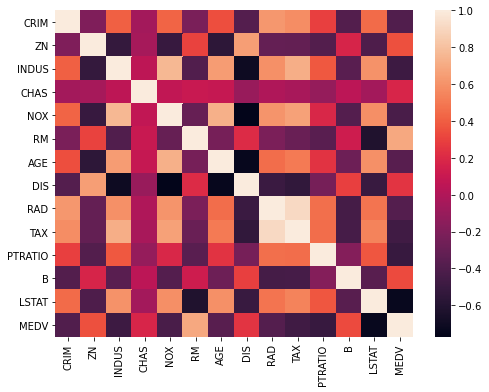

In [7]:
sns.heatmap(corr)

y.head()

In [8]:
X = housing_dataset.drop(["MEDV"], axis = 1)
y = housing_dataset.filter(["MEDV"], axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94


In [9]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
house_predictor = LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)